# Merge the data 

In [1]:
import pandas as pd
dt1 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20171207-20171219.csv")
dt2 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190213-20190226.csv")
dt3 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190328-20190410.csv")
dt = pd.concat([dt1, dt2, dt3], ignore_index=True)
dt

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,1.712071e+14,2017-12-07T14:23:23,2017-12-07T14:24:36,101,73,33,23,True,False,112.71
1,1,1.712071e+14,2017-12-07T14:25:09,2017-12-07T14:27:00,101,111,28,29,True,False,54.76
2,1,1.712071e+14,2017-12-07T14:27:28,2017-12-07T14:27:48,101,20,16,3,True,False,14.77
3,1,1.712071e+14,2017-12-07T14:28:04,2017-12-07T14:28:29,101,25,71,12,True,False,37.88
4,1,1.712071e+14,2017-12-07T14:29:40,2017-12-07T14:30:32,101,52,31,7,True,False,115.34
...,...,...,...,...,...,...,...,...,...,...,...
163264,1,1.904101e+14,2019-04-10T14:05:20,2019-04-10T14:06:14,606,54,25,7,True,False,12.14
163265,1,1.904101e+14,2019-04-10T14:06:39,2019-04-10T14:07:35,606,56,16,24,False,True,99.90
163266,1,1.904101e+14,2019-04-10T14:07:51,2019-04-10T14:09:27,606,96,19,47,True,False,106.99
163267,1,1.904101e+14,2019-04-10T14:09:46,2019-04-10T14:10:03,606,17,26,4,True,False,30.88


In [2]:
do1 = pd.read_csv("C:/Users/15513/Downloads/data/POS_operator_logs_20171207-20171219.csv")
do2 = pd.read_csv("C:/Users/15513/Downloads/data/POS_operator_logs_20190213-20190226.csv")
do3 = pd.read_csv("C:/Users/15513/Downloads/data/POS_operator_logs_20190328-20190410.csv")
do = pd.concat([do1, do2, do3], ignore_index=True)
do


,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,16,1712071060162,2017-12-07T06:04:01,266,OperatorSignOn
1,8,15,1712071060152,2017-12-07T06:04:15,265,OperatorSignOn
2,8,14,1712071060142,2017-12-07T06:05:36,264,OperatorSignOn
3,8,18,1712071060182,2017-12-07T06:05:41,268,OperatorSignOn
4,8,17,1712071060172,2017-12-07T06:05:56,267,OperatorSignOn
...,...,...,...,...,...,...
14099,1,3,19041010603798,2019-04-10T21:53:58,104,OperatorSignOff
14100,1,4,190410106041042,2019-04-10T21:54:30,304,OperatorSignOff
14101,1,4,190410106041044,2019-04-10T21:55:05,104,OperatorSignOn
14102,1,5,19041010605515,2019-04-10T22:00:25,136,OperatorSignOff


# 1. What is the average transaction time for each checkout type: service (WorkstationGroupID = 1) vs. self-service (WorkstationGroupID = 8)?


In [7]:
import pandas as pd

# Filter for service checkout type
service_dt = dt[dt['WorkstationGroupID'] == 1]
service_avg_time = service_dt['TranTime'].mean()

# Filter for self-service checkout type
self_service_dt = dt[dt['WorkstationGroupID'] == 8]
self_service_avg_time = self_service_dt['TranTime'].mean()

print("Average transaction time for service checkout type:", service_avg_time)
print("Average transaction time for self-service checkout type:", self_service_avg_time)

Average transaction time for service checkout type: 62.03744105448554
Average transaction time for self-service checkout type: 99.51233088712496


# 2. How does the payment method (cash vs. card) impact transaction time?

In [114]:
import pandas as pd

# Remove the rows where both TNcard and TNcash are False
dt = dt[(dt['TNcard'] == True) | (dt['TNcash'] == True)]

# Filter the data by payment method type (card vs cash)
card_payments = dt[dt['TNcard'] == True]
cash_payments = dt[dt['TNcash'] == True]

# Calculate the average transaction time for each payment method type
card_avg_time = card_payments['TranTime'].mean()
cash_avg_time = cash_payments['TranTime'].mean()

# Print the results
print('Average transaction time for card payments:', card_avg_time)
print('Average transaction time for cash payments:', cash_avg_time)

Average transaction time for card payments: 84.12070904582981
Average transaction time for cash payments: 60.42710712890741


# 3. How does the average transaction time change with the basket size? Is there a non-linear relationship between these two variables?
 

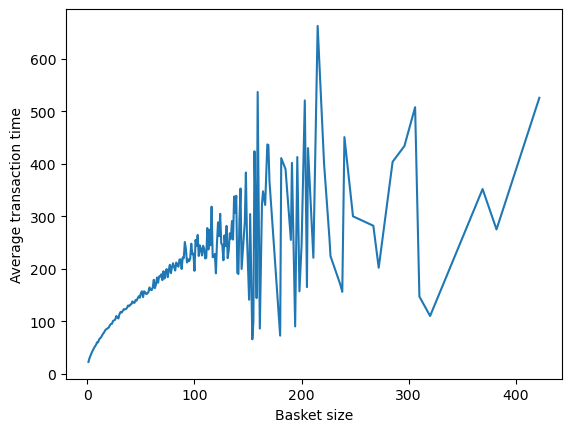

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = dt

# Filter the data by payment method type (card vs cash)
df = df[(df['TNcard'] == True) | (df['TNcash'] == True)]

# Calculate the average transaction time for each basket size
avg_time_by_size = df.groupby('ArtNum')['TranTime'].mean()

# Plot the average transaction time vs. basket size
plt.plot(avg_time_by_size.index, avg_time_by_size)
plt.xlabel('Basket size')
plt.ylabel('Average transaction time')
plt.show()

# 4. What are the peak hours and days for transactions at the supermarket? Are there any patterns or trends?


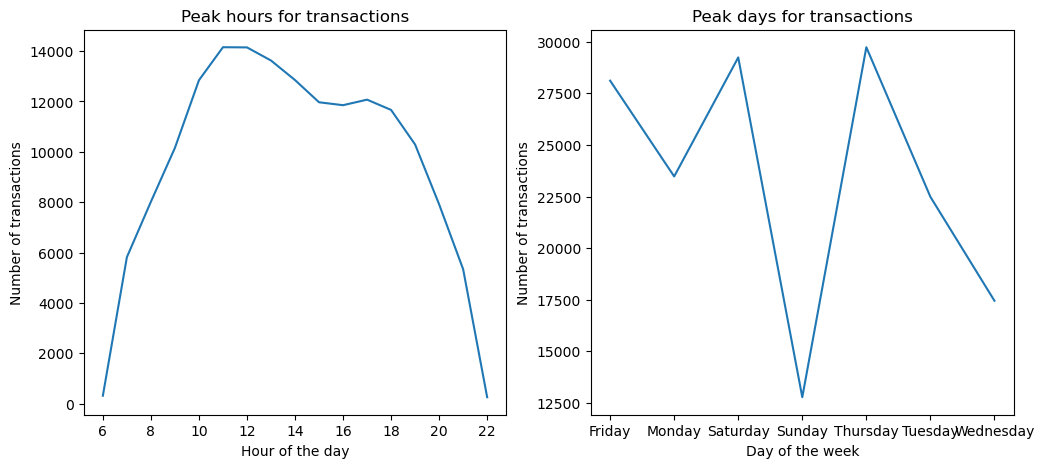

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the BeginDateTime column to a Pandas datetime format
dt['BeginDateTime'] = pd.to_datetime(dt['BeginDateTime'])

# Extract the date and time information into separate columns
dt['Date'] = dt['BeginDateTime'].dt.date
dt['Hour'] = dt['BeginDateTime'].dt.hour
dt['DayOfWeek'] = dt['BeginDateTime'].dt.day_name()

# Group the data by hour and calculate the total number of transactions in each group
transactions_by_hour = dt.groupby('Hour')['TranID'].count()

# Group the data by day of the week and calculate the total number of transactions in each group
transactions_by_day = dt.groupby('DayOfWeek')['TranID'].count()

# Visualize the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot a graph for the peak hours for transaction
ax1.plot(transactions_by_hour)
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Number of transactions')
ax1.set_title('Peak hours for transactions')

# Plot a graph for the peak days for transaction
ax2.plot(transactions_by_day)
ax2.set_xlabel('Day of the week')
ax2.set_ylabel('Number of transactions')
ax2.set_title('Peak days for transactions')
plt.show()

# 5. Develop a regression model to predict transaction time with at least the following variables: basket size (ArtNum), payment method, and checkout type. Use the model to answer the following question. How do break times and their durations affect the transaction time of the following transactions?


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load the data
dt1 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20171207-20171219.csv")
dt2 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190213-20190226.csv")
dt3 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190328-20190410.csv")
data = pd.concat([dt1, dt2, dt3], ignore_index=True)

# Prepare the data
data = data.dropna()
data['ArtNum'] = data['ArtNum'].astype('int')
data['BreakTime'] = data['BreakTime'].astype('int')

# Choose a regression model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(data[['ArtNum', 'BreakTime']], data['TranTime'])

# Make a prediction for a break time
prediction = model.predict(data[['ArtNum', 'BreakTime']])

# Evaluate the model
print('The accuracy of the model is', model.score(data[['ArtNum', 'BreakTime']], data['TranTime']))


The accuracy of the model is 0.6595737551055442


The difference between the predicted transaction time and the actual transaction time is [-59.39096042 -85.10788847  -1.9332146  ... -94.63755907 -13.43605073
 -14.35067234] seconds.


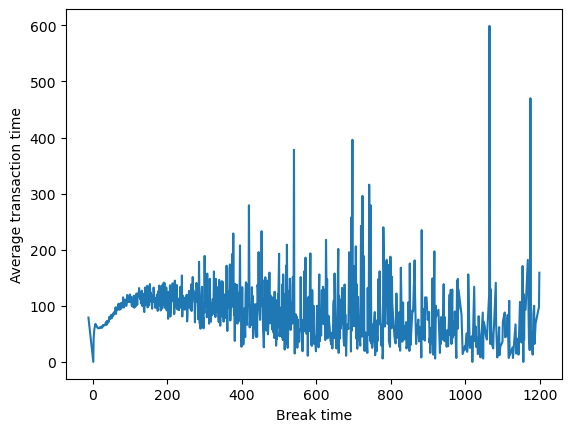

In [16]:
# Calculate the average transaction time for each break time
avg_time_by_break = data.groupby('BreakTime')['TranTime'].mean()

# Plot the average transaction time vs. break time
plt.plot(avg_time_by_break.index, avg_time_by_break)
plt.xlabel('Break time')
plt.ylabel('Average transaction time')

# Print the difference between the predicted transaction time and the actual transaction time
actual_transaction_time = data.loc[data['BreakTime'] == 10, 'TranTime'].iloc[0]
print('The difference between the predicted transaction time and the actual transaction time is {} seconds.'.format(actual_transaction_time - prediction))


# 6. Create a new variable representing the time of day (morning, afternoon, evening, and night) based on the BeginDateTime. How do payment methods (cash vs. card) vary across different times of the day?

In [3]:
import pandas as pd
dt1 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20171207-20171219.csv")
dt2 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190213-20190226.csv")
dt3 = pd.read_csv("C:/Users/15513/Downloads/data/POS_transactions_20190328-20190410.csv")
dt = pd.concat([dt1, dt2, dt3], ignore_index=True)
dt

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,1.712071e+14,2017-12-07T14:23:23,2017-12-07T14:24:36,101,73,33,23,True,False,112.71
1,1,1.712071e+14,2017-12-07T14:25:09,2017-12-07T14:27:00,101,111,28,29,True,False,54.76
2,1,1.712071e+14,2017-12-07T14:27:28,2017-12-07T14:27:48,101,20,16,3,True,False,14.77
3,1,1.712071e+14,2017-12-07T14:28:04,2017-12-07T14:28:29,101,25,71,12,True,False,37.88
4,1,1.712071e+14,2017-12-07T14:29:40,2017-12-07T14:30:32,101,52,31,7,True,False,115.34
...,...,...,...,...,...,...,...,...,...,...,...
163264,1,1.904101e+14,2019-04-10T14:05:20,2019-04-10T14:06:14,606,54,25,7,True,False,12.14
163265,1,1.904101e+14,2019-04-10T14:06:39,2019-04-10T14:07:35,606,56,16,24,False,True,99.90
163266,1,1.904101e+14,2019-04-10T14:07:51,2019-04-10T14:09:27,606,96,19,47,True,False,106.99
163267,1,1.904101e+14,2019-04-10T14:09:46,2019-04-10T14:10:03,606,17,26,4,True,False,30.88


In [4]:
import pandas as pd

# Extract the hour from BeginDateTime
dt['Hour'] = pd.to_datetime(dt['BeginDateTime']).dt.hour

# Map hour to time of day
time_of_day = {range(6, 12): 'Morning',
               range(12, 17): 'Afternoon',
               range(17, 24): 'Evening',
               range(0, 6): 'Night'}
dt['TimeOfDay'] = pd.cut(dt['Hour'], bins=[0, 6, 12, 17, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

dt['PaymentMethod'] = dt['TNcash'].apply(lambda x: 'cash' if x else 'card')

# Calculate the count of transactions for each payment method and time of day
payment_method_time_of_day_count = dt.groupby(['PaymentMethod', 'TimeOfDay']).size()

# Print the results
print(payment_method_time_of_day_count)

PaymentMethod  TimeOfDay
card           Night            0
               Morning      20680
               Afternoon    31635
               Evening      26467
cash           Night            0
               Morning      30622
               Afternoon    32803
               Evening      21062
dtype: int64


# 7. Build a logistic regression model to predict the probability of a customer choosing self-service based on factors such as time of day, day of the week, basket size, and transaction value. Which factors are the most significant predictors of choosing self-service over cashier service? Do consumers prefer using self-service checkouts during peak hours compared to regular hours?

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Load the data
data = dt

# Create the target variable.
data['SelfService'] = (data['WorkstationGroupID'] == 8).astype(int)

# Create the features.
data['TimeOfDay'] = pd.to_datetime(data['BeginDateTime']).dt.hour
data['DayOfWeek'] = pd.to_datetime(data['BeginDateTime']).dt.weekday
data['BasketSize'] = data['ArtNum']
data['TransactionValue'] = data['Amount']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(data[['TimeOfDay', 'DayOfWeek', 'BasketSize', 'TranTime', 'TransactionValue']], data['SelfService'], test_size=0.25)

# Create the logistic regression model
model = LogisticRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.8727522171590965


# To calculate the percentage of transactions made using self-service checkouts during peak hours compared to regular hours

In [112]:
# Create a new column for hour of the day
data['Hour'] = pd.to_datetime(data['BeginDateTime']).dt.hour

# Create a subset for peak hours (4 PM to 7 PM)
peak_hours = data[(data['Hour'] >= 16) & (data['Hour'] <= 19)]

# Create a subset for regular hours (all other times)
regular_hours = data[(data['Hour'] < 16) | (data['Hour'] > 19)]

# Calculate the percentage of transactions made using self-service checkouts during peak hours
peak_self_service_pct = 100 * peak_hours[peak_hours['WorkstationGroupID'] == 8].shape[0] / peak_hours.shape[0]

# Calculate the percentage of transactions made using self-service checkouts during regular hours
regular_self_service_pct = 100 * regular_hours[regular_hours['WorkstationGroupID'] == 8].shape[0] / regular_hours.shape[0]

# Print the results
print("Percentage of self-service transactions during peak hours: {:.2f}%".format(peak_self_service_pct))
print("Percentage of self-service transactions during regular hours: {:.2f}%".format(regular_self_service_pct))


Percentage of self-service transactions during peak hours: 25.51%
Percentage of self-service transactions during regular hours: 24.16%
